# Day 07 — Gradient Descent (Everything Comes Together)

## Objective
Understand **training as a process**:
repeated, scaled updates to model parameters that minimize cost.

By the end of this notebook, you should be able to explain
**training end-to-end without code**.


## What Training Is

Training is not a formula.
Training is a loop.

Each iteration:
1. Make predictions
2. Measure loss
3. Compute gradient
4. Update parameters
5. Repeat

Learning emerges from repetition.


In [1]:
import numpy as np
import matplotlib.pyplot as plt


## A Simple Loss Function

We start with a 1D convex loss:

L(w) = (w - 3)²

This has:
- A single global minimum
- Clean geometry
- No distractions

Perfect for understanding motion.


In [2]:
def loss(w):
    return (w - 3) ** 2

def gradient(w):
    return 2 * (w - 3)


## One Gradient Descent Step

One update:
- Read slope (gradient)
- Move opposite to it
- Scale movement with learning rate

That’s the entire algorithm.


In [3]:
w = 0.0
learning_rate = 0.1

w_new = w - learning_rate * gradient(w)
w, w_new


(0.0, 0.6000000000000001)

## Iterative Training

Training happens over many iterations.
Each step moves closer to the minimum.


In [4]:
w = 0.0
learning_rate = 0.1
steps = 30

history = []

for step in range(steps):
    history.append((w, loss(w)))
    w = w - learning_rate * gradient(w)

history[-1]


(2.99535772485268, 2.1550718543425615e-05)

## Convergence Intuition

As w approaches the minimum:
- Gradient shrinks
- Updates become smaller
- Motion slows naturally

This is convergence.


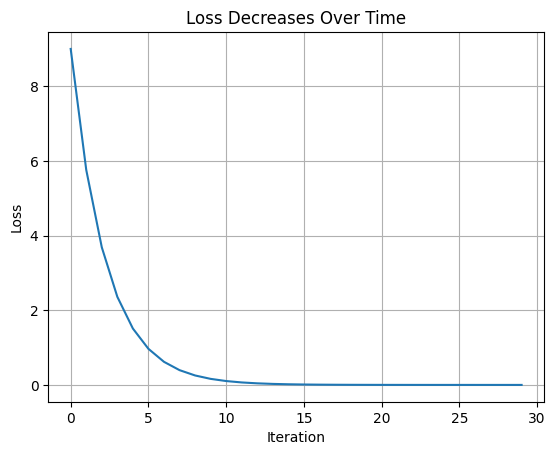

In [5]:
loss_values = [l for _, l in history]

plt.plot(loss_values)
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Loss Decreases Over Time")
plt.grid()
plt.show()


## Learning Rate Controls Stability

Learning rate answers:
“How big is each step downhill?”

- Too small → slow learning
- Too large → overshoot, oscillation, divergence


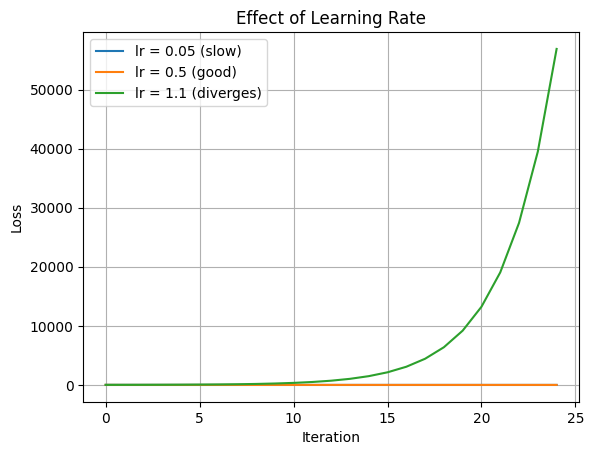

In [6]:
def run_gd(lr):
    w = 0.0
    losses = []
    for _ in range(25):
        losses.append(loss(w))
        w = w - lr * gradient(w)
    return losses

plt.plot(run_gd(0.05), label="lr = 0.05 (slow)")
plt.plot(run_gd(0.5), label="lr = 0.5 (good)")
plt.plot(run_gd(1.1), label="lr = 1.1 (diverges)")
plt.legend()
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Effect of Learning Rate")
plt.grid()
plt.show()


## Why Training Stops

Training does NOT stop because:
- Loss = 0
- Accuracy = 100%

Training stops because:
- Gradient becomes very small
- Updates become negligible
- Noise floor is reached

This prevents infinite training.


## Multi-Weight Intuition

In real models:
- w becomes a vector
- gradient becomes a vector
- All parameters update simultaneously

This is Day 4 applied over time.


## From Scalar to Vectorized Gradient Descent

So far:
- One weight
- One gradient
- One update

Real ML models:
- Many features
- Weight vector
- Gradient vector

The learning rule does NOT change.
Only the data structure changes.


## The Vectorized Update Rule (Non-Negotiable)

This is the exact line you will use in Week B:

```python
w = w - lr * dw


In [7]:

# Example: 3-feature model
w = np.array([2.0, -1.0, 0.5])   # weight vector
dw = np.array([4.0, -2.0, 1.0])  # gradient vector
lr = 0.1

w_new = w - lr * dw
w, w_new


(array([ 2. , -1. ,  0.5]), array([ 1.6, -0.8,  0.4]))

## Why This Works

- Each weight has its own slope
- Gradient vector collects all slopes
- Learning rate scales the entire update
- Vector subtraction updates all weights together

This is:
- Day 01 → vectors
- Day 04 → gradients
- Day 06 → loss
- Day 07 → iteration

Unified into one executable rule.


## Direct Mapping to Linear Regression

In Linear Regression:
- X → feature matrix
- w → weight vector
- ŷ = X @ w → predictions
- dw = (1/m) * Xᵀ @ (ŷ − y) → gradient

But the update step is STILL:

```python
w = w - lr * dw



## Day 7 Summary — Training Demystified

- Training is iterative
- Loss defines what “downhill” means
- Gradient gives direction
- Learning rate controls stability
- Convergence happens naturally
- Vectorized GD is just scaled subtraction

You now understand training end-to-end.


## Final Stop Condition — Week A Complete

You are done if you can explain WITHOUT code:

- One gradient descent iteration
- Why learning rate controls stability
- Why convergence happens
- Why divergence happens
- Why scalar and vectorized GD are the same idea

If yes → Week A is complete.
